In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from BlackScholes import BS_option, BS_imply_volatility

#### Set Parameters

In [6]:
spot = np.linspace(5, 200, 50)
K = 100
r = 0.03
T = 1
sigmas = [0.1, 0.3, 0.5, 0.7,.9]
opt_dict = {}
for sigma in sigmas:
    opt_dict[f"call_{100*sigma}"] = [BS_option(S, K, T, r, sigma, 'C')[0] for S in spot]
intrinsic_value = np.clip(spot-K, 0, None)

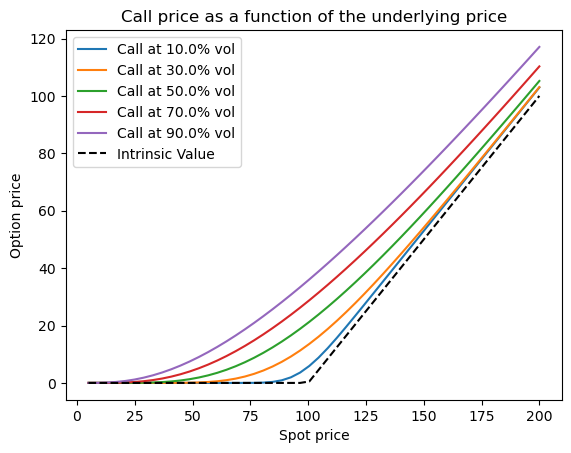

In [7]:
for sigma in sigmas:
    plt.plot(spot, opt_dict[f"call_{100*sigma}"], label=f"Call at {100*sigma}% vol")
plt.plot(spot, intrinsic_value, "k--", label="Intrinsic Value")
plt.title("Call price as a function of the underlying price")
plt.xlabel("Spot price")
plt.ylabel("Call price")
plt.legend();